In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
plt.rc('axes', axisbelow=True)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.4254675516249067
[ 0.8983821  -0.43768534  0.47865566]
0.21592312260438185


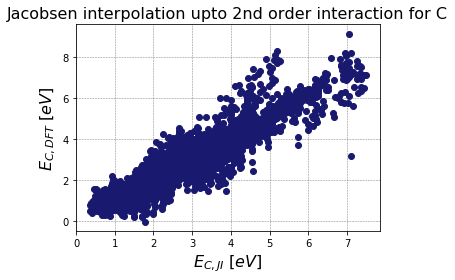

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.3507259390094387
[ 1.53395303  0.64944242 -1.24168136]
0.03259953135856897


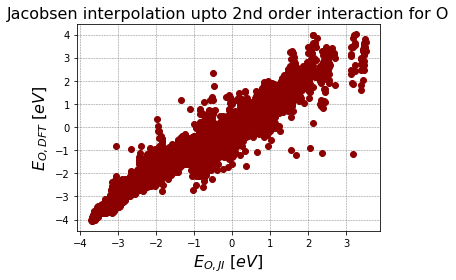

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.4115620064917328
[ 0.820015   -0.36055976  0.4964103 ]
0.09314051503196127


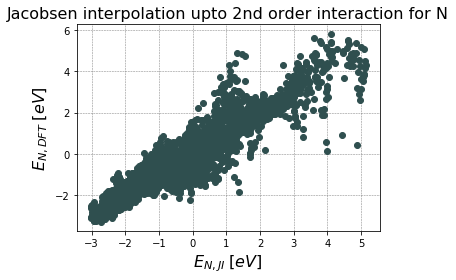

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.15332304203773203
[ 1.76390668  0.69673151 -1.50882697]
0.01780157437095292


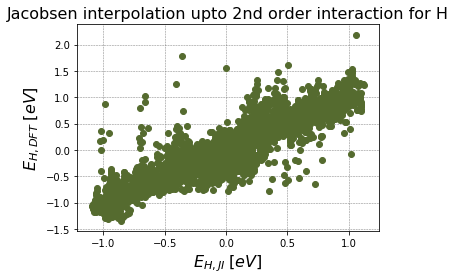

/Applications/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.2903649124589526
[ 1.71859776  1.16252181 -1.90648608]
0.0070411758549959735


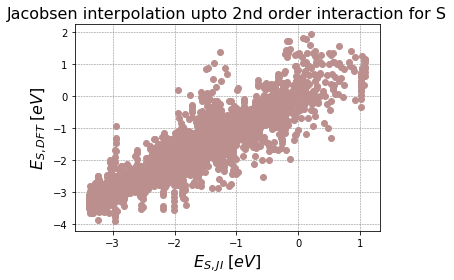

In [4]:
adsorbates = ['C', 'O', 'N', 'H', 'S']
colors = ['midnightblue', 'darkred', 'darkslategrey', 
         'darkolivegreen', 'rosybrown']

for ads, col in zip(adsorbates, colors):
    data = np.load('../Fingerprint_Generation/{}_data.npy'.format(ads))[()]
    x_s_d0 = np.array([i[2] for i in data])
    x_s_d1 = np.array([i[4] for i in data])
    x_s_d2 = np.array([i[6] for i in data])
    y = np.array([i[-1] for i in data]) 
    X = np.column_stack([x_s_d0, x_s_d1, x_s_d2])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    print(MAE)
    coeff = reg.coef_
    print(reg.coef_)
    print(reg.intercept_)
    y_pred = reg.intercept_ + coeff[0] * x_s_d0 + \
             coeff[1] * x_s_d1 + coeff[2] * x_s_d2
    
    plt.figure()
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.title('Jacobsen interpolation upto 2nd order interaction for {}'.format(ads), fontsize=16)
    plt.xlabel(r"$E_{0}\;[{1}]$".format('{' + ads + ', JI' + '}', 'eV'), fontsize=16)
    plt.ylabel(r"$E_{0}\;[{1}]$".format('{' + ads + ', DFT' + '}', 'eV'), fontsize=16)
    plt.scatter(y_pred, y, marker='o', color=col, label='data points')
    #plt.plot(x_s, y, '-', color='black', alpha=0.5, label="Scaling line")
    #text = "slope = {0:0.2f}\nintercept = {1:0.2f}\nr^2 = {2:0.2f}\nMAE={3:0.2f}"
    #text = text.format(slope, intercept, r_squared, MAE)
    #plt.xlim([0, 4])
    #plt.ylim([0, 4])
    #plt.text(0.9, 3, text, 
    #     ha='center', 
    #     va='center', 
    #     fontsize=12, 
    #     bbox=dict(facecolor='w', 
    #               edgecolor='black',
    #               boxstyle='round',
    #               pad=1))
    #plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    #plt.savefig('JI_D0_{}.png'.format(ads))
    plt.show()
    

In [16]:
def reg_m(x, y):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [18]:
for ads, col in zip(adsorbates, colors):
    data = np.load('../Fingerprint_Generation/{}_data.npy'.format(ads))[()]
    x_s_d0 = np.array([i[2] for i in data])
    x_s_d1 = np.array([i[4] for i in data])
    x_s_d2 = np.array([i[6] for i in data])
    y = np.array([i[-1] for i in data]) 
    X = np.column_stack([x_s_d0, x_s_d1, x_s_d2])
    print(reg_m(X.T, y).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     7971.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        22:21:01   Log-Likelihood:                -3261.6
No. Observations:                3719   AIC:                             6531.
Df Residuals:                    3715   BIC:                             6556.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5186      0.255      2.034      0.0